# Assemblin Simulator Data 10 - 11 November

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.express as ex
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected = True)
init_notebook_mode(connected = True)

# 1. Read and Preprocessing Data

In [2]:
#Import data, replace -999 as NaN value, and print samples
X = pd.read_csv('building-10-11-nov.csv', na_values = ['-999'])
X.sample(5)

,Date,Time,Room Temperature,Room Setpoint,Heating Demand,Cooling Demand,Heating/Cooling External Control,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External
780,11/11/2020,04:59:01,18.575212,17.0,0.000000,100.000000,0.0,3.97,3.97,0.00,0.00
1107,11/11/2020,10:32:08,21.789381,21.0,0.000000,100.000000,0.0,6.44,6.44,8.09,8.09
1244,11/11/2020,12:55:13,21.783733,21.0,0.000000,100.000000,0.0,6.57,6.57,12.60,12.60
94,10/11/2020,17:19:47,21.696787,21.0,0.000000,31.673517,0.0,1.46,1.46,0.02,0.02
226,10/11/2020,19:33:49,19.974485,21.0,58.969421,0.000000,0.0,0.86,0.86,0.01,0.01


In [3]:
#Check the column type to see if there is object
print('------------- COLUMN TYPE -------------')
print(X.dtypes)

------------- COLUMN TYPE -------------
Date                                 object
Time                                 object
Room Temperature                    float64
Room Setpoint                       float64
Heating Demand                      float64
Cooling Demand                      float64
Heating/Cooling External Control    float64
Current Outside Temperature         float64
Outside Temperature External        float64
Current Solar Power                 float64
Solar Power External                float64
dtype: object


In [4]:
#Combine the Date and Time column and change it to date time format
X['Date'] = X['Date'] + " " + X['Time']
X['Date'] = pd.to_datetime(X['Date'], format = "%d/%m/%Y %H:%M:%S")

#Delete Time column and change Date column to Datetime
X.drop(['Time'], inplace = True, axis = 1)
X.rename(columns = {'Date': 'Datetime'}, inplace = True)
X.head(5)

,Datetime,Room Temperature,Room Setpoint,Heating Demand,Cooling Demand,Heating/Cooling External Control,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External
0,2020-11-10 15:45:46,21.974766,21.0,0.0,39.449593,0.0,2.46,2.46,41.580002,41.580002
1,2020-11-10 15:46:46,22.033531,21.0,0.0,47.688942,0.0,2.46,2.46,41.580002,41.580002
2,2020-11-10 15:47:46,22.039042,21.0,0.0,55.189651,0.0,2.46,2.46,41.580002,41.580002
3,2020-11-10 15:48:46,22.008871,21.0,0.0,62.138638,0.0,2.46,2.46,41.580002,41.580002
4,2020-11-10 15:49:46,21.956482,21.0,0.0,68.388054,0.0,2.46,2.46,41.580002,41.580002


In [5]:
#Set Datetime to be the index column
X.set_index(['Datetime'], inplace = True)
X.sample(5)

,Room Temperature,Room Setpoint,Heating Demand,Cooling Demand,Heating/Cooling External Control,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External
Datetime,,,,,,,,,
2020-11-10 19:49:49,19.983702,21.0,56.455322,0.0,0.0,0.86,0.86,0.01,0.01
2020-11-11 07:40:05,18.711697,17.0,0.000000,100.0,0.0,5.22,5.22,0.00,0.00
2020-11-10 18:10:49,20.954193,21.0,0.000000,0.0,0.0,1.10,1.10,0.00,0.00
2020-11-11 10:39:08,21.828814,21.0,0.000000,100.0,0.0,6.44,6.44,8.09,8.09
2020-11-10 22:14:55,18.521679,17.0,0.000000,100.0,0.0,0.94,0.94,0.00,0.00


## 2. Explore Data

In [6]:
X.head(10)

,Room Temperature,Room Setpoint,Heating Demand,Cooling Demand,Heating/Cooling External Control,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External
Datetime,,,,,,,,,
2020-11-10 15:45:46,21.974766,21.0,0.0,39.449593,0.0,2.46,2.46,41.580002,41.580002
2020-11-10 15:46:46,22.033531,21.0,0.0,47.688942,0.0,2.46,2.46,41.580002,41.580002
2020-11-10 15:47:46,22.039042,21.0,0.0,55.189651,0.0,2.46,2.46,41.580002,41.580002
2020-11-10 15:48:46,22.008871,21.0,0.0,62.138638,0.0,2.46,2.46,41.580002,41.580002
2020-11-10 15:49:46,21.956482,21.0,0.0,68.388054,0.0,2.46,2.46,41.580002,41.580002
2020-11-10 15:50:46,21.893200,21.0,0.0,74.107437,0.0,2.46,2.46,41.580002,41.580002
2020-11-10 15:51:46,21.826086,21.0,0.0,79.128609,0.0,2.46,2.46,41.580002,41.580002
2020-11-10 15:52:46,21.758089,21.0,0.0,83.591118,0.0,2.46,2.46,41.580002,41.580002
2020-11-10 15:53:46,21.693729,21.0,0.0,87.491089,0.0,2.46,2.46,41.580002,41.580002


In [7]:
print('Shape =', X.shape)
print()
print('NaN value at each column:')
print(X.isna().sum())

Shape = (1248, 9)

NaN value at each column:
Room Temperature                    1
Room Setpoint                       1
Heating Demand                      1
Cooling Demand                      1
Heating/Cooling External Control    1
Current Outside Temperature         1
Outside Temperature External        4
Current Solar Power                 1
Solar Power External                1
dtype: int64


There are 1248 rows in total with some missing values in every column.

In [8]:
#Check rows with NaN
X[X.isnull().any(axis = 1)]

,Room Temperature,Room Setpoint,Heating Demand,Cooling Demand,Heating/Cooling External Control,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External
Datetime,,,,,,,,,
2020-11-10 20:26:52,19.982553,21.0,38.238167,0.0,0.0,0.71,NaN,0.0,0.0
2020-11-10 21:34:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-11 03:12:58,18.533184,17.0,0.000000,100.0,0.0,3.12,NaN,0.0,0.0
2020-11-11 03:40:00,18.542953,17.0,0.000000,100.0,0.0,3.12,NaN,0.0,0.0


In [9]:
#Drop NaN values
X.dropna(inplace = True)

In [10]:
X.describe().round(3)

,Room Temperature,Room Setpoint,Heating Demand,Cooling Demand,Heating/Cooling External Control,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External
count,1244.000,1244.000,1244.000,1244.000,1244.0,1244.000,1244.000,1244.000,1244.000
mean,19.781,18.926,10.651,71.140,0.0,3.299,3.302,2.478,2.455
std,1.377,1.999,26.386,40.548,0.0,2.107,2.109,5.977,5.881
min,18.469,17.000,0.000,0.000,0.0,0.570,0.570,0.000,0.000
25%,18.534,17.000,0.000,36.602,0.0,1.460,1.460,0.000,0.000
50%,18.808,17.000,0.000,100.000,0.0,2.960,2.960,0.000,0.000
75%,21.550,21.000,0.000,100.000,0.0,5.220,5.220,0.020,0.020
max,22.090,21.000,100.000,100.000,0.0,6.610,6.610,41.580,41.580


The _Heating/Cooling External Control_ column is all 0. Thus, it can be removed.

In [11]:
#Delete the Heating/Cooling External Control
X.drop(['Heating/Cooling External Control'], axis = 1, inplace = True)
X.sample(5)

,Room Temperature,Room Setpoint,Heating Demand,Cooling Demand,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External
Datetime,,,,,,,,
2020-11-10 23:35:56,18.482258,17.0,0.0,100.0,1.52,1.52,0.00,0.00
2020-11-11 00:41:56,18.488005,17.0,0.0,100.0,2.13,2.13,0.00,0.00
2020-11-11 10:16:08,21.626989,21.0,0.0,100.0,6.44,6.44,8.09,8.09
2020-11-11 05:48:01,18.607172,17.0,0.0,100.0,4.47,4.47,0.00,0.00
2020-11-11 01:39:57,18.500505,17.0,0.0,100.0,2.52,2.52,0.00,0.00


## 3. Visualizing Data

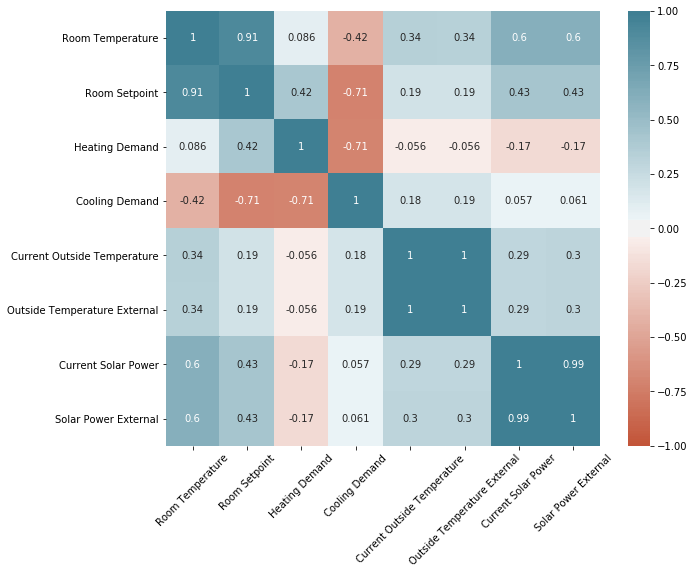

In [12]:
#Correlation matrix
plt.figure(figsize = (10,8))
corr = X.corr()
ax = sns.heatmap(
    corr, annot = True,
    vmin=-1, vmax=1, center= 0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0
);

In [13]:
#Plot the whole dataset generally
X.iplot(width = 1.5, xTitle = 'Date')

In [14]:
#Plot the Room Temperature, Room Setpoint, Current Outside Temperature, Outside Temperature External, Current Solar Power, Solar Power External
X.loc[ : , ['Room Temperature', 'Room Setpoint', 'Current Outside Temperature', 'Outside Temperature External', 'Current Solar Power', 'Solar Power External']].iplot(width = 2, xTitle = 'Date')

In [15]:
#Change Heating/Cooling Demand from range [0, 100] to range [0, 10] for better visualization
#Plot the Room Temperature, Room Setpoint, and Heating/Cooling Demand
X_temp = X.loc[ : , ['Room Temperature', 'Room Setpoint', 'Heating Demand', 'Cooling Demand']]
X_temp['Heating Demand'] = X_temp['Heating Demand'] / 10
X_temp['Cooling Demand'] = X_temp['Cooling Demand'] / 10
X_temp.loc[ : , ['Room Temperature', 'Room Setpoint', 'Heating Demand', 'Cooling Demand']].iplot(width = 2, xTitle='Date')